In [111]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_stata("h243.dta")

df = pd.DataFrame(data)

# List of variables to use
columns_to_keep = [
    'REGION22', 'FAMS1231', 'RXEXP22', 'CANCERDX', 'UNINS22', 
    'PRVEV22', 'MCDEV22', 'MCREV22', 'HOUR53', 'EMPST53', 
    'FAMINC22', 'HIDEG', 'MARRY22X', 'RACEV1X', 'SEX', 'AGELAST', 'TOTSLF22'
]

df = df[columns_to_keep]



#Converted column SEX formated 1 MALE into MALE, 2 FEMALE into FEMALE:
df['SEX'] = df['SEX'].str.split().str[1]
df['SEX']


# Simplify column RACEV1X to one word race categories
def simplify_race(race):
    if "WHITE" in race:
        return "WHITE"
    elif "BLACK" in race:
        return "BLACK"
    elif "AMER INDIAN" in race or "ALASKA NATIVE" in race:
        return "AMER INDIAN/ALASKA NATIVE"
    elif "ASIAN" in race or "NATV HAWAIIAN" in race or "PACFC ISL" in race:
        return "ASIAN"
    elif "MULTIPLE" in race:
        return "MULTIPLE"
    else:
        return "UNKNOWN"

df["RACEV1X"] = df["RACEV1X"].apply(simplify_race)


df['MARRY22X'] = df['MARRY22X'].replace({
    '2 WIDOWED': 'WIDOWED',
    '3 DIVORCED': 'DIVORCED',
    '5 NEVER MARRIED': 'NEVER MARRIED',
    '6 UNDER AGE 16 - INAPPLICABLE': 'UNDER AGE 16',
    '1 MARRIED': 'MARRIED',
    '4 SEPARATED': 'SEPARATED',
    '-7 REFUSED': 'REFUSED',
    '-8 DON\'T KNOW': 'DON\'T KNOW'
})



df['HIDEG'] = df['HIDEG'].replace({
    '1 NO DEGREE': 'NO DEGREE',
    '7 OTHER DEGREE': 'OTHER DEGREE',
    '5 MASTER\'S DEGREE': 'MASTER\'S DEGREE',
    '4 BACHELOR\'S DEGREE': 'BACHELOR\'S DEGREE',
    '8 UNDER AGE 16 - INAPPLICABLE': 'UNDER AGE 16',
    '3 HIGH SCHOOL DIPLOMA': 'HIGH SCHOOL DIPLOMA',
    '2 GED': 'GED',
    '6 DOCTORATE DEGREE': 'DOCTORATE DEGREE',
    '-8 DON\'T KNOW': 'DON\'T KNOW',
    '-7 REFUSED': 'REFUSED'
})


df['EMPST53'] = df['EMPST53'].replace({
    '4 NOT EMPLOYED DURING RD 5/3': 'NOT EMPLOYED',
    '3 JOB DURING RD 5/3 REF PERIOD': 'JOB DURING REF',
    '1 EMPLOYED AT RD 5/3 INT DATE': 'EMPLOYED',
    '-1 INAPPLICABLE': 'INAPPLICABLE',
    '2 JOB TO RETURN TO AT RD 5/3 INT DATE': 'HAS JOB TO RETURN',
    '-7 REFUSED': 'REFUSED',
    '-15 CANNOT BE COMPUTED': 'CANNOT COMPUTE',
    '-8 DON\'T KNOW': 'DON\'T KNOW'
})

#Yes or No values:
df["MCREV22"] = df["MCREV22"].str.split().str[1]
df["MCDEV22"] = df["MCDEV22"].str.split().str[1]
df["PRVEV22"] = df["PRVEV22"].str.split().str[1]
df["UNINS22"] = df["UNINS22"].str.split().str[1]
df["CANCERDX"] = df["CANCERDX"].str.split().str[1]

#FAMILY SIZE COLUMN = NUMERICAL
df['FAMS1231'] = df['FAMS1231'].replace({
    '-1 INAPPLICABLE': None,  
    '1 PERSON': 1,
    '2 PERSONS': 2,
    '3 PERSONS': 3,
    '4 PERSONS': 4,
    '5 PERSONS': 5,
    '6 PERSONS': 6,
    '7 PERSONS': 7,
    '8 PERSONS': 8,
    '9 PERSONS': 9,
    '10 PERSONS': 10,
    '11 PERSONS': 11,
    '14 PERSONS': 14
})
df['FAMS1231'] = pd.to_numeric(df['FAMS1231'], errors='coerce')

#convert hours53 into numerical; replace invalid values as nan:
invalid_values = ['-15 CANNOT BE COMPUTED', '-8 DON\'T KNOW', '-7 REFUSED', '-2 DETERMINED IN PREVIOUS ROUND']
df['HOUR53'] = df['HOUR53'].replace(invalid_values, np.nan)

# Convert the column to numeric (invalid values will become NaN)
df['HOUR53'] = pd.to_numeric(df['HOUR53'], errors='coerce')


df['REGION22'] = df['REGION22'].replace({
    '-1 INAPPLICABLE': 'INAPPLICABLE',
    '1 NORTHEAST': 'NORTHEAST',
    '2 MIDWEST': 'MIDWEST',
    '3 SOUTH': 'SOUTH',
    '4 WEST': 'WEST'
})



# Convert to numeric (coerce errors to NaN)
df['RXEXP22'] = pd.to_numeric(df['RXEXP22'], errors='coerce')

# Select numerical columns
numeric_cols = df.select_dtypes(include=['int64', 'int32', 'float64']).columns.tolist()

# Print the names of numerical columns
print(f'Numerical columns: {numeric_cols}')




Numerical columns: ['FAMS1231', 'RXEXP22', 'HOUR53', 'FAMINC22', 'TOTSLF22']


C:\Users\juesh\AppData\Local\Temp\ipykernel_23180\2055419442.py:44: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['MARRY22X'] = df['MARRY22X'].replace({
C:\Users\juesh\AppData\Local\Temp\ipykernel_23180\2055419442.py:57: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['HIDEG'] = df['HIDEG'].replace({
C:\Users\juesh\AppData\Local\Temp\ipykernel_23180\2055419442.py:71: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To

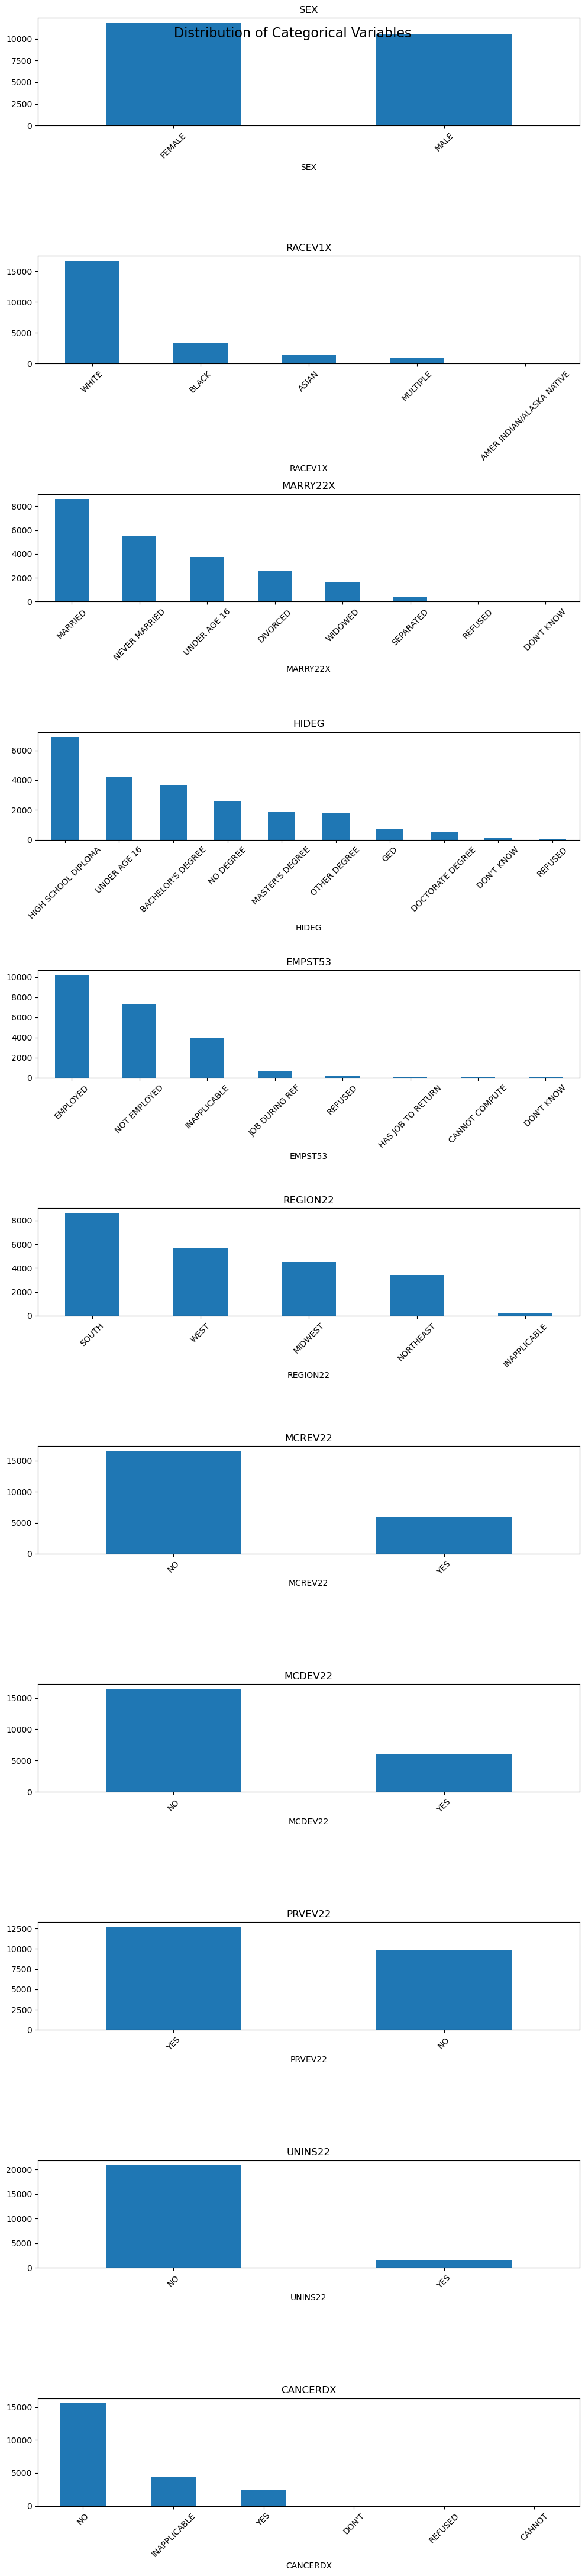

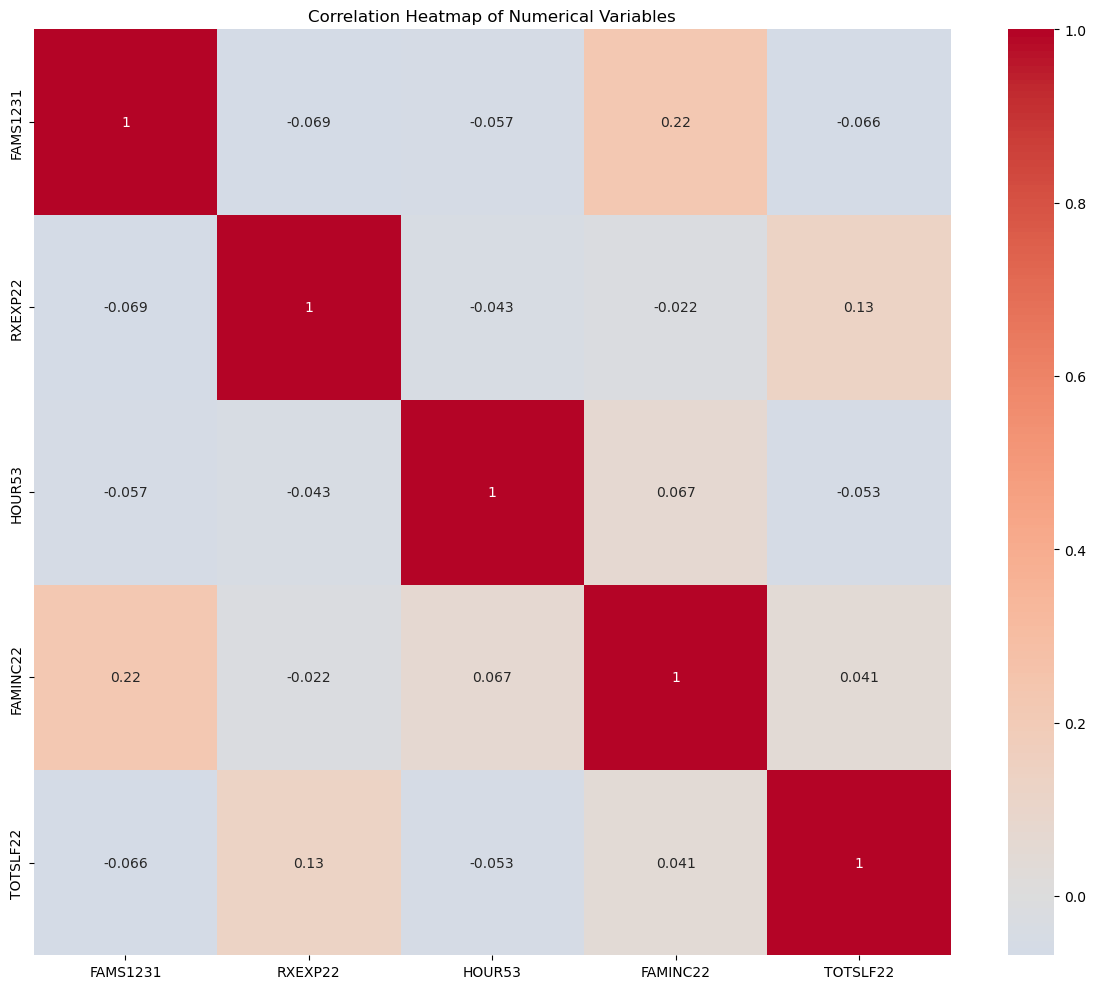

C:\Users\juesh\AppData\Local\Temp\ipykernel_23180\3529358949.py:41: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='TOTSLF22', data=df, ax=axes[i], ci=None)
C:\Users\juesh\AppData\Local\Temp\ipykernel_23180\3529358949.py:41: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='TOTSLF22', data=df, ax=axes[i], ci=None)
C:\Users\juesh\AppData\Local\Temp\ipykernel_23180\3529358949.py:41: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='TOTSLF22', data=df, ax=axes[i], ci=None)
C:\Users\juesh\AppData\Local\Temp\ipykernel_23180\3529358949.py:41: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='TOTSLF22', data=df, ax=axes[i], ci=None)
C:\Users\juesh\AppData\Local\Temp\ipykernel_23180\3529358949.py:41: FutureWarning: 

The `ci` pa

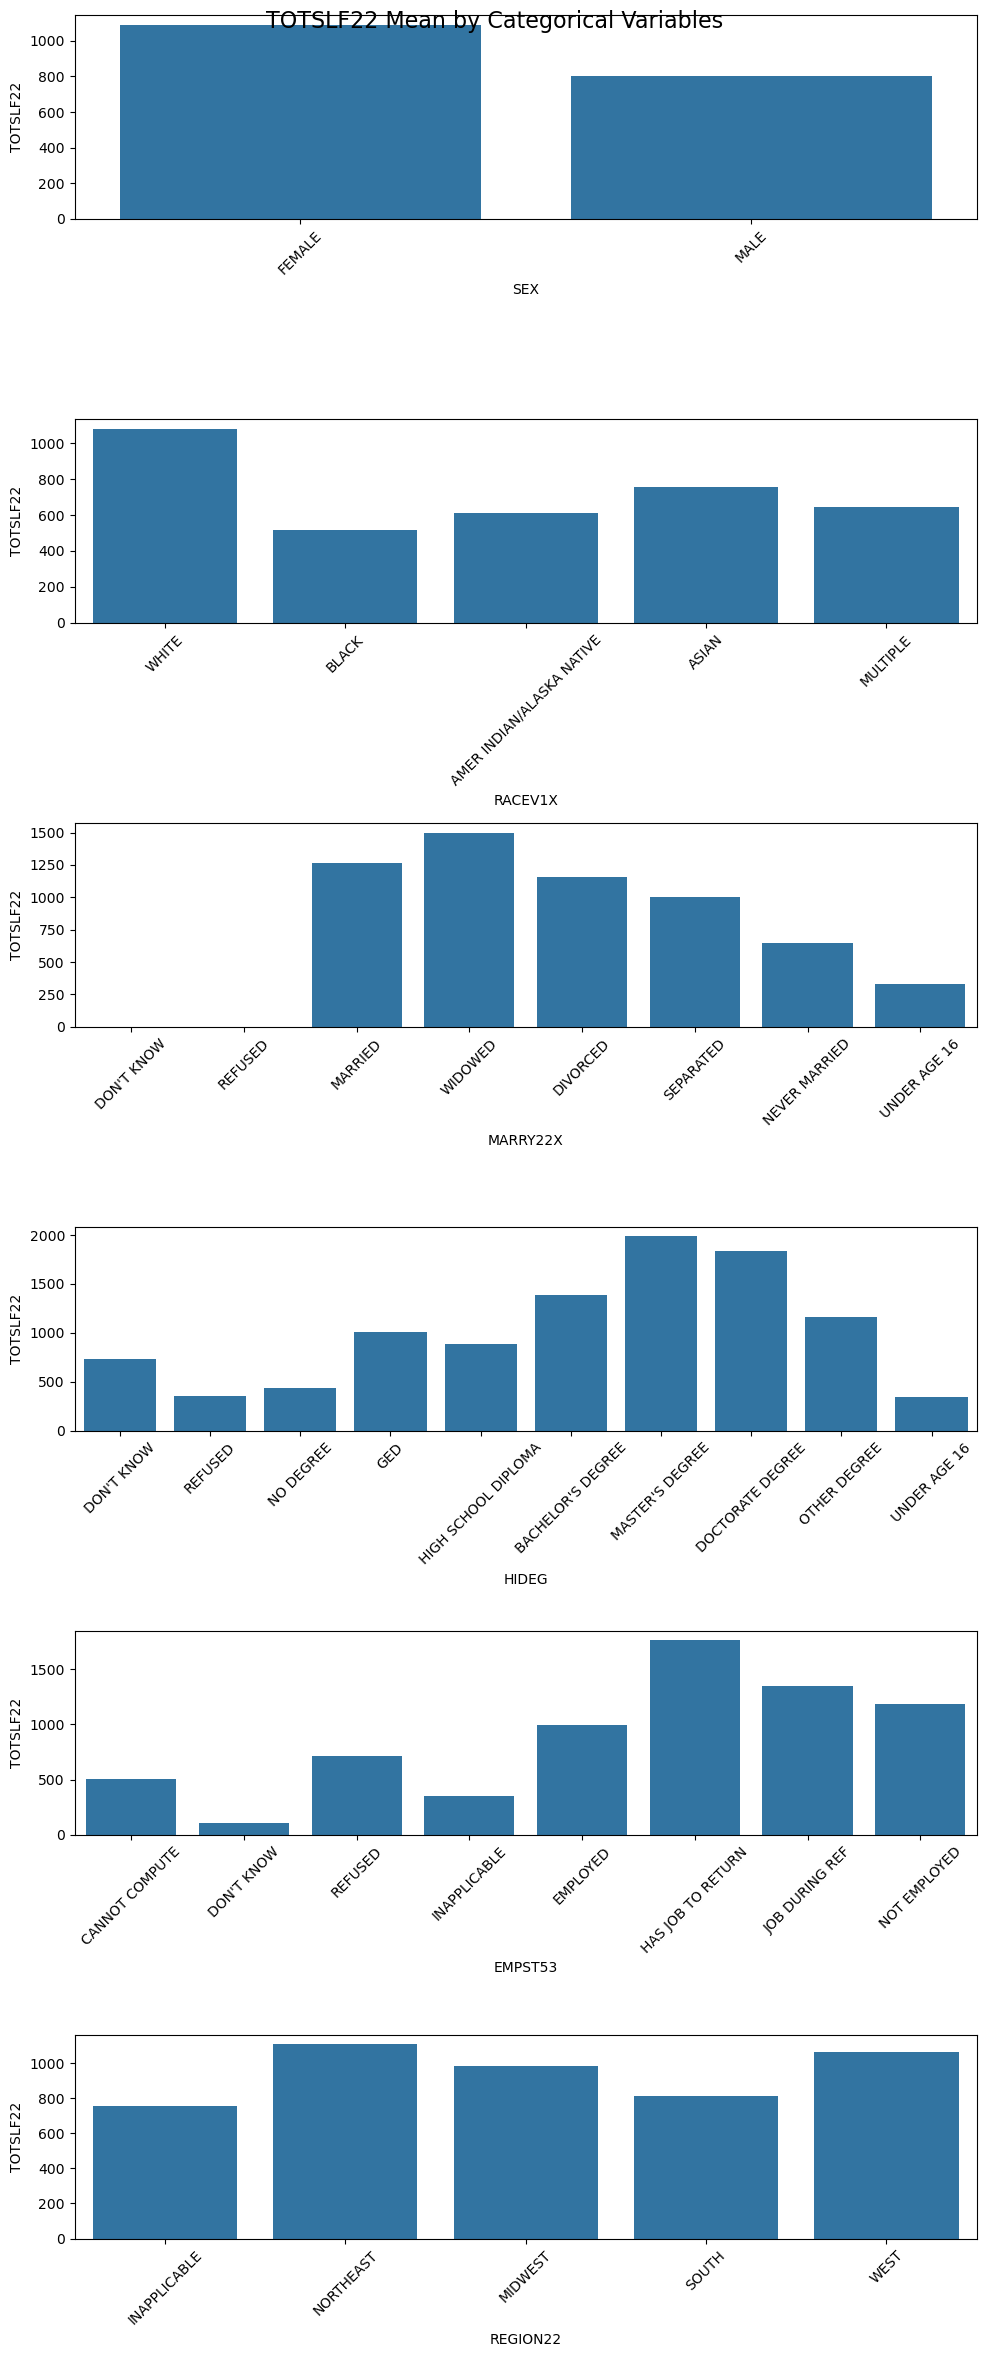

In [ ]:
# Categorical Variables Distribution
def plot_categorical_distributions(df):
    categorical_cols = ['SEX', 'RACEV1X', 'MARRY22X', 'HIDEG', 'EMPST53', 'REGION22', 'MCREV22', 'MCDEV22', 'PRVEV22', 'UNINS22', 'CANCERDX']
    
    fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(10, 4*len(categorical_cols)))
    fig.suptitle('Distribution of Categorical Variables', fontsize=16)
    
    for i, col in enumerate(categorical_cols):
        df[col].value_counts().plot(kind='bar', ax=axes[i], title=col)
        axes[i].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

plot_categorical_distributions(df)



# Numerical Variables Correlation Heatmap
def plot_correlation_heatmap(df):
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Heatmap of Numerical Variables')
    plt.tight_layout()
    plt.show()

plot_correlation_heatmap(df)


def plot_barplots(df):
    categorical_cols = ['SEX', 'RACEV1X', 'MARRY22X', 'HIDEG', 'EMPST53', 'REGION22']
    
    fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(10, 4*len(categorical_cols)))
    fig.suptitle('TOTSLF22 Mean by Categorical Variables', fontsize=16)
    
    for i, col in enumerate(categorical_cols):
        sns.barplot(x=col, y='TOTSLF22', data=df, ax=axes[i], ci=None)
        axes[i].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

plot_barplots(df)



In [113]:
#ONE HOT ENCODING 

categorical_columns = [
    'REGION22', 'MARRY22X', 'SEX', 'RACEV1X', 'HIDEG', 
    'EMPST53', 'MCREV22', 'MCDEV22', 'PRVEV22', 'UNINS22', 'CANCERDX'
]

df[categorical_columns] = df[categorical_columns].astype('category')

df = pd.get_dummies(df, columns=categorical_columns)

print(df)



       FAMS1231  RXEXP22  HOUR53  FAMINC22  AGELAST  TOTSLF22  \
0           1.0     1602     NaN     22000       77       109   
1           2.0     1442     NaN      5000       64       976   
2           2.0       20     NaN     30740       67        20   
3           1.0     6292     NaN    106483       29      1165   
4           1.0      252     NaN     45000       51       691   
...         ...      ...     ...       ...      ...       ...   
22426       2.0      803     NaN     58720       85        82   
22427       2.0      311     NaN     58720       85        70   
22428       1.0      316     NaN     15008       62       198   
22429       1.0      998     NaN     37819       65       632   
22430       1.0     2061     NaN     10884       85       198   

       REGION22_INAPPLICABLE  REGION22_NORTHEAST  REGION22_MIDWEST  \
0                      False               False              True   
1                      False               False              True   
2        